# Percentiles

Bien, entonces ya saben qué son los percentiles, es momento de comenzar a trabajar con datos.

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Cargar los datos
titanic = pd.read_csv('/content/titanic (1).csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

sliced_df = titanic[['Pclass', 'Sex','Age']]

Bien, ya tenemos nuestra muestra, entonces vamos a tener que calcular dos cosas antes de obtener el Z-score

In [2]:
# Calcular los percentiles

perc = np.percentile(sliced_df['Age'], [1, 5, 10, 20, 50, 80, 90, 95, 99])
perc

array([ 1.  ,  5.  , 14.8 , 19.  , 28.  , 40.4 , 49.  , 55.85, 66.  ])

Bien ya tenemos algunos percentiles, ahora lo bueno es cómo representarlos

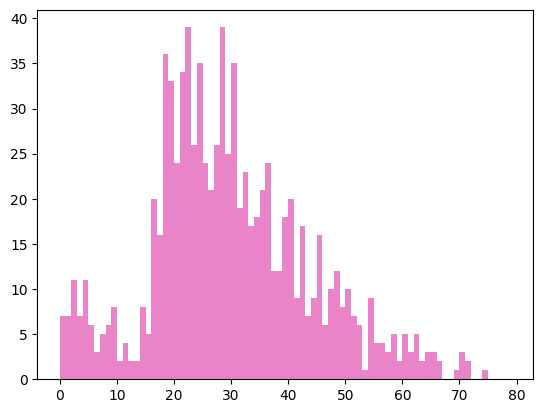

In [3]:
# Supongamos que hacemos un histograma de frecuencias de todas las edades

bins = range(0, int(np.max(sliced_df['Age'])), 1);

fig, ax = plt.subplots()
plt.hist( sliced_df['Age'],bins = bins,  color = '#ea84c9');

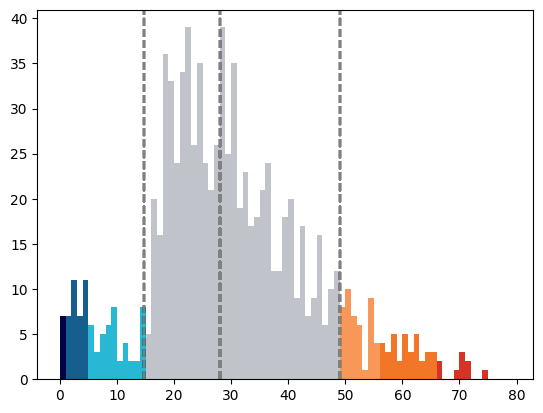

In [6]:
# Ahora supongamos que lo que queremos ver es cómo están repartidas
# basandonos en los valores de los percnetiles

fig, ax = plt.subplots()
counts, bins, patches = plt.hist( sliced_df['Age'], bins = bins);
# Colorear las barras según la condición
for patch, left_side, right_side in zip(patches, bins[:-1], bins[1:]):
    bin_center = (left_side + right_side) / 2  # Calcular el centro del bin

    if bin_center >= perc[-1]:
        patch.set_facecolor('#d63226')
    elif bin_center > perc[7]:
        patch.set_facecolor('#f17628')
    elif bin_center > perc[6]:
        patch.set_facecolor('#f79858')
    elif bin_center < perc[0]:
        patch.set_facecolor('#020344')
    elif bin_center < perc[1]:
        patch.set_facecolor('#155e8d')
    elif bin_center < perc[2]:
        patch.set_facecolor('#28b8d5')
    else:
        patch.set_facecolor('#c0c4ca')
    plt.axvline(x = perc[4], color = 'grey', linestyle='--', alpha = 0.1)
    plt.axvline(x = perc[2], color = 'grey', linestyle='--', alpha = 0.1)
    plt.axvline(x = perc[-3], color = 'grey', linestyle='--', alpha = 0.1)

Al observar la distribución con los percentiles, podemos observar que quizás no se repartan como intuitivamente esperábamos.
De esta manera podemos dividir los datos de manera objetiva.

Vamos a ver otro ejemplo

In [8]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Cargar los datos
gasolina = pd.read_csv('gas_prices.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

gasolina_mxn = gasolina.copy()
gasolina_mxn.iloc[:, 1:] = gasolina.iloc[:, 1:].mul(16).round(2)

In [9]:
# Vamos a obtener ahora los percentiles de los precios

perc = np.nanpercentile(gasolina_mxn.iloc[:, 1:], [5, 10, 50, 90, 95])

In [13]:
# Ahora esta es una manera de iluminar sus dataframes
# usos tiene muchos, dependerá qué es lo que quieran lograr


# Aquí por facilidad haremos una función que otorgue un color dependiendo de
# si el valor que evaluamos está por encima, por debajo o en un rango del percentil

def color_fondo(value, column, perc):
    if value <= perc[0]:
        color = '#216869'
    elif (value > perc[0]) & (value <= perc[1]):
        color = '#49a078'
    elif (value >= perc[4]) & (value < 200):
        color = '#81171b'
    elif (value > perc[3]) & (value <= perc[4]):
        color = '#c75146'
    else:
        color = ''
    return f'background-color: {color}'


# Aquí lo que hacemos es cambiar el estilo del dataframe
# Aplicando una función lambda
(gasolina_mxn.style
 .apply(lambda x: x.apply(color_fondo, column = x.name, perc = perc), axis = 0)
 .format(precision=2)
)#.to_excel("Df_estilos.xlsx")


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,nan,29.92,58.08,42.40,73.44,50.56,16.00,32.80,45.12,18.56
1,1991,31.36,30.72,55.20,46.40,72.00,55.36,20.80,39.84,48.16,18.24
2,1992,30.24,27.68,56.96,52.32,72.48,57.28,24.00,42.40,48.96,18.08
3,1993,27.68,25.12,54.56,49.12,58.88,66.56,24.96,46.08,45.44,17.76
4,1994,29.44,23.20,57.44,56.32,59.20,69.76,23.68,45.92,47.84,17.76
5,1995,31.20,24.48,68.16,63.36,64.00,70.88,17.76,47.04,51.36,18.40
6,1996,33.92,25.76,70.56,63.04,70.24,58.24,20.00,50.88,53.44,19.68
7,1997,32.80,25.92,64.00,56.48,65.12,52.16,23.52,53.44,61.28,19.68
8,1998,26.08,22.08,61.92,53.44,61.44,45.12,23.84,48.64,64.96,16.96
9,1999,27.52,24.32,61.60,54.72,61.92,52.32,28.64,60.80,68.64,18.72


In [14]:
# Las funciones lambda son similares a las funciones normales pero escritas de manera diferente

# Función para sumar
def suma(x,y):
    return(x + y)

# Función para sumar con lambda
lambda x,y : x + y
# Y se guardan así
suma_dos = lambda x,y : x + y

In [15]:
# Supongamos que queremos analizar un sólo país i.e. Mexico

# Calculemos algunos percentiles
mex_q = np.quantile(gasolina_mxn['Mexico'], [0.20, 0.50, 0.80]) # 23.6, 28.64, 35.36


# Ajustar la función para que sólo adctúe sobre la columna de México

def color_fondo_mx(value, column, perc):
  if column == 'Mexico':
    if value <= perc[0]:
        color = '#216869'
    elif (value > perc[0]) & (value <= perc[1]):
        color = '#49a078'
    elif (value >= perc[2]) :
        color = '#81171b'
    elif (value > perc[1]) & (value <= perc[2]):
        color = '#c75146'
    else:
        color = ''
  else:
    color = ''
  return f'background-color: {color}'


# Y aquí aplicamos el estilo
(gasolina_mxn.style
 .apply(lambda x: x.apply(color_fondo_mx, column = x.name, perc = mex_q), axis = 0)
 .format(precision=2)
)#.to_excel("Df_estilos.xlsx")

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,nan,29.92,58.08,42.40,73.44,50.56,16.00,32.80,45.12,18.56
1,1991,31.36,30.72,55.20,46.40,72.00,55.36,20.80,39.84,48.16,18.24
2,1992,30.24,27.68,56.96,52.32,72.48,57.28,24.00,42.40,48.96,18.08
3,1993,27.68,25.12,54.56,49.12,58.88,66.56,24.96,46.08,45.44,17.76
4,1994,29.44,23.20,57.44,56.32,59.20,69.76,23.68,45.92,47.84,17.76
5,1995,31.20,24.48,68.16,63.36,64.00,70.88,17.76,47.04,51.36,18.40
6,1996,33.92,25.76,70.56,63.04,70.24,58.24,20.00,50.88,53.44,19.68
7,1997,32.80,25.92,64.00,56.48,65.12,52.16,23.52,53.44,61.28,19.68
8,1998,26.08,22.08,61.92,53.44,61.44,45.12,23.84,48.64,64.96,16.96
9,1999,27.52,24.32,61.60,54.72,61.92,52.32,28.64,60.80,68.64,18.72


Muy bien, su turno


In [ ]:
# Encuentren los percentiles 5, 15, 85 y 95 de 5 países los que ustedes quieran (el percentil debe de ser de cada país no de todos)

# Iluminen el dataframe de tal manera que:
# Verde claro: por debajo del P5
# Amarillo: entre el P5 y P15
# Naranja: entre el P85 y P95
# Rojo: arriba del P95


Un último análisis que podemos hacerle a nuestros datos

In [51]:
# Supongamos que queremos analizar un sólo país i.e. Mexico

# Calculemos algunos percentiles
fran_q = np.nanpercentile(gasolina_mxn['France'], [5,15,85,95]) # 23.6, 28.64, 35.36
kor_q = np.nanpercentile(gasolina_mxn['South Korea'], [5,15,85,95])
germa_q = np.nanpercentile(gasolina_mxn['Germany'], [5,15,85,95])
uka_q = np.nanpercentile(gasolina_mxn['UK'], [5,15,85,95])
ita_q = np.nanpercentile(gasolina_mxn['Italy'], [5,15,85,95])

paises_q = [fran_q, kor_q, germa_q, uka_q, ita_q ]
paises = ['France', 'South Korea', 'Germany', 'UK', 'Italy']
# Ajustar la función para que sólo adctúe sobre la columna de México

def color_fondo_mx(value, column, perc):
  n = 0
  for column in paises:
    for ii in paises_q:
      if value <= perc[0]:
          color = 'limegreen'
      elif (value > perc[0]) & (value <= perc[1]):
          color = 'yellow'
      elif (value > perc[2]) & (value <= perc[3]):
          color = 'darkorange'
      elif (value > perc[3]):
          color = 'red'
      else:
          color = ''
      ii += 1
  else:
    color = ''
  return f'background-color: {color}'


# Y aquí aplicamos el estilo
(gasolina_mxn.style
 .apply(lambda x: x.apply(color_fondo_mx, column = x.name, perc=paises_q), axis = 0)
 .format(precision=2)
)#.to_excel("Df_estilos.xlsx")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [40]:
# Calculamos los percentiles para cada país
fran_q = np.nanpercentile(gasolina_mxn['France'], [5, 15, 85, 95]) # 23.6, 28.64, 35.36
kor_q = np.nanpercentile(gasolina_mxn['South Korea'], [5, 15, 85, 95])
germa_q = np.nanpercentile(gasolina_mxn['Germany'], [5, 15, 85, 95])
uka_q = np.nanpercentile(gasolina_mxn['UK'], [5, 15, 85, 95])
ita_q = np.nanpercentile(gasolina_mxn['Italy'], [5, 15, 85, 95])

paises_q = {'France': fran_q, 'South Korea': kor_q, 'Germany': germa_q, 'UK': uka_q, 'Italy': ita_q}

# Ajustamos la función para que actúe solo sobre la columna de México y coloree según los percentiles del país respectivo
def color_fondo_mx(value, column):
  for column in paises_q:  # Solo actuamos sobre la columna de México
        if value <= paises_q[column][0]:
            color = 'limegreen'
        elif value > paises_q[column][0] and value <= paises_q[column][1]:
            color = 'yellow'
        elif value > paises_q[column][2] and value <= paises_q[column][3]:
            color = 'darkorange'
        elif value > paises_q[column][3]:
            color = 'red'
        else:
            color = ''
    else:
        color = ''
    return f'background-color: {color}'

# Aplicamos el estilo y formateamos el DataFrame
styled_df = gasolina_mxn.style.applymap(color_fondo_mx)
styled_df.format(precision=2)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

In [41]:
paises_q

{'France': array([ 55.136,  56.72 ,  89.376, 107.056]),
 'South Korea': array([39.136, 44.864, 87.12 , 95.184]),
 'Germany': array([ 46.   ,  51.36 ,  92.336, 111.472]),
 'UK': array([ 45.408,  48.064,  97.392, 114.544]),
 'Italy': array([ 58.704,  59.648,  93.568, 109.12 ])}